In [20]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

# Datasets Malicious Payload

In [17]:
sec_list = [
    'crlf', 
    'ldap', 
    'lfi', 
    'nosql', 
    'rfi', 
    'shell', 
    'sql', 
    'ssi', 
    'ssti', 
    'xml', 
    'xpath', 
    'xss', 
    'xxe'
]

for sec in sec_list:
    
    # Directory containing the text files
    directory = '../data/malicious-payload/' + sec
    
    # List all files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    
    # Check if all_lines.txt exists
    output_file_path = os.path.join('../data/malicious-payload/'+sec+'.txt')
    if os.path.exists(output_file_path):
        os.remove(output_file_path)
    
    # Loop through each file
    for file_name in files:
        with open(os.path.join(directory, file_name), 'r', encoding='utf-8', errors='ignore') as file:
            # 'errors=ignore' will skip any characters that can't be decoded
            lines = file.readlines()  # Read all lines in the file
    
        # Create or open the output file to store lines from all files
        with open(output_file_path, 'a', encoding='utf-8') as output_file:
            # Write lines from the current file to the output file
            for line in lines:
                output_file.write(line)

In [25]:
directory = '../data/malicious-payload/'

xss = 'xss.txt'
xxe = 'xxe.txt'
sqli = 'sql.txt'
nosql = 'nosql.txt'
rfi = 'rfi.txt'
lfi = 'lfi.txt'
crlf = 'crlf.txt'
ssti = 'ssti.txt'
ssi = 'ssi.txt'

files_array = [xss, xxe, sqli, nosql, rfi, lfi, ssti, crlf, ssi]

#This function will combine all wordlists into a single csv
def processdata_and_store(files_array):
    #Create empty data frame
    empty_dfs = []
    for files in range(len(files_array)):
        unique_set = set()
        with open(os.path.join(directory, files_array[files]), 'r') as f:
            #Removes "\n"
            for add in f.read().strip().splitlines():
                unique_set.add(add)
    
        unique_list = list(unique_set)
        while("" in unique_list) : 
            unique_list.remove("") 

        payloads_df = pd.DataFrame({'Payloads': unique_list, 'Types': files_array[files].split(".")[0]})
        empty_dfs.append(payloads_df)

    malicious_payload_df = pd.concat(empty_dfs, ignore_index=True)
    malicious_payload_df.to_csv('../data/malicious-payload/malicious-payload-datasets.csv', encoding='utf-8', index=False)

processdata_and_store(files_array)

malicious_payload_df = pd.read_csv('../data/malicious-payload/malicious-payload-datasets.csv')
malicious_payload_df.sample(n=20)

,Payloads,Types
35724,../../../../../../../../../../../../../Volumes...,lfi
36478,/etc/ipmasq/rules/A02unkernelforward.def,lfi
7974,<div onfocusout=alert(1) tabindex=1 id=x></div...,xss
13711,or SLEEP(5)--,sql
36655,{{self}},ssti
3532,onmove,xss
5739,"<strike onmouseenter=""alert(1)"">test</strike>",xss
31194,/proc/self/fd/15%00,lfi
8255,<svg%0Aonload=%09((pro\u006dpt))()//,xss
25519,../../../../../../../../../../../../../../bin/...,lfi


# Datasets Normal Payload

In [26]:
tree = ET.parse('../data/normal-payload/learning_dataset.xml')
root = tree.getroot()

print(root.attrib)

# Define namespaces
namespace = {'ecmlpkdd': 'http://www.example.org/ECMLPKDD'}

# Create lists to store data
query_list = []
headers_list = []
types_list = []

# Iterate through each sample
for sample in root.findall('ecmlpkdd:sample', namespace):
    # Check if class is "Valid"
    if sample.find('ecmlpkdd:class/ecmlpkdd:type', namespace).text == 'Valid' and sample.find('ecmlpkdd:request/ecmlpkdd:query', namespace) is not None:
        request = sample.find('ecmlpkdd:request', namespace)
        query_list.append(request.find('ecmlpkdd:query', namespace).text)
        headers_list.append(request.find('ecmlpkdd:headers', namespace).text)
        types_list.append('normal')
        

# Create DataFrame
normal_payload_df = pd.DataFrame({
    'Payloads': query_list,
    'Types': types_list
})

# Save DataFrame to CSV
normal_payload_df.to_csv('../data/normal-payload/normal-payload.csv', index=False)
normal_payload_df.sample(n=20)

{'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.example.org/ECMLPKDD ECMLPKDD.xsd '}


,Payloads,Types
13376,qSF8cG=ue&niEapRji6ei=907514&oiaskci7hphQqe7=i...,normal
7166,nnetotTam=0756378&ctseeray=erms%28%2F&plc=nu&8...,normal
6901,Zopen2J_=wAQ%40BOEjS&LpJEU=wp-wbint&scriptIAwe...,normal
5298,taso=%3Eobo&h0eude=sFasetEa&stdin6Am=HfziemT6c...,normal
20768,HeVneleuheO=eHaiw&eers=ewdiq&oAeuhieqiD=xsnetc...,normal
1262,eahK=Hz7dr1ur+tig&C1L.UL=4-sny&n8bsrHrjacovhi=...,normal
17942,emjqnN3hamyoleD=3aserviceseh&t0t=h&sfjyIa9wstn...,normal
14706,vuEia0=68452316&sd=6&ssnrat=u_W1Ii54W&buSwnsea...,normal
3163,reko1ec=nAse5cSvvt%3E%5C&swt=%3A%3CdocumentS&2...,normal
1040,5aRas=c7ROS%402ifTd&sbEenoome=ttn&pmE7ZtHvbscr...,normal


# Combine Datasets

In [30]:
datasets_df = pd.concat([malicious_payload_df, normal_payload_df])
datasets_df.to_csv ('../data/datasets/datasets.csv', index = None)

# Removing duplicates
datasets_clean_df = datasets_df.drop_duplicates(subset=['Payloads', 'Types'])
counts = datasets_clean_df['Types'].value_counts()

,Payloads,Types
4383,"<;/TITLE>;<;SCRIPT>;alert(""XSS"");<;/SCRIPT>;",xss
18114,/var/log/exim_paniclog%00,lfi
9178,<;/br style=a:expression(alert())>;,xss
21513,../../../../usr/local/cpanel/logs/login_log%00,lfi
6878,eLmembtdg=e%401esu&tso1bcfDesnIti=aef&9ut=p0%2...,normal
27360,%252e%252e%252f%252e%252e%252f%252e%252e%252f%...,lfi
6708,"<rtc draggable=""true"" ondrag=""alert(1)"">test</...",xss
16530,/components/com_thopper/inc/projectstatus_type...,rfi
13113,"sUE.,: select * from users where id='1' union ...",sql
13077,Era=27638790&usoluslol=4&0aiosuisdsre=ipfpdz+K...,normal


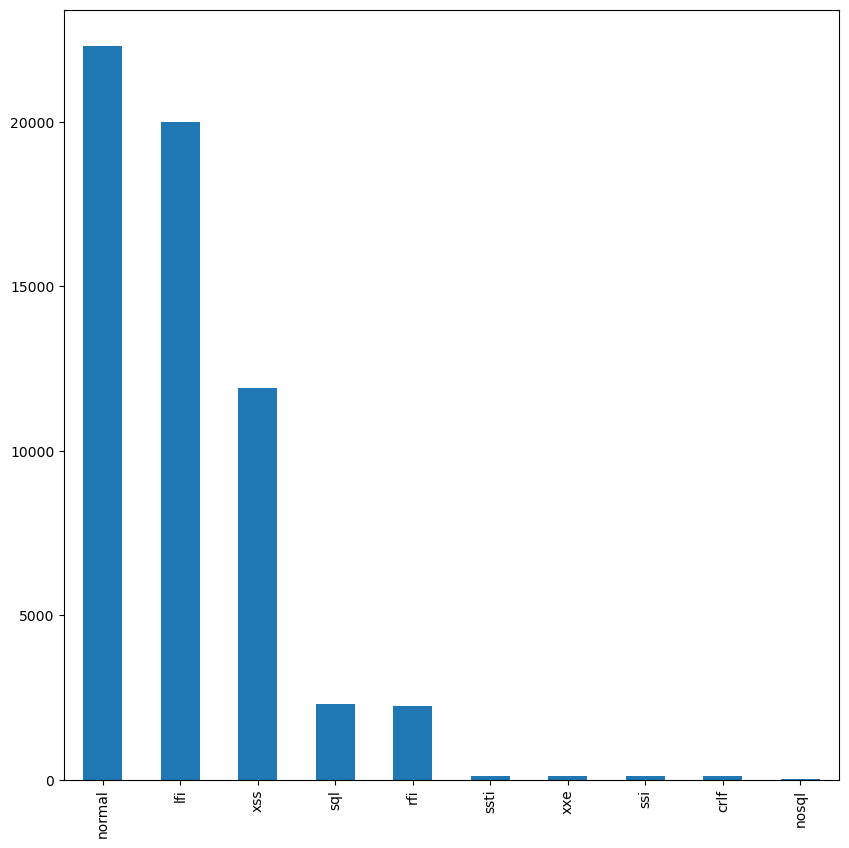

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
counts.plot.bar(figsize=(10, 10))
datasets_clean_df.sample(n=20)